This notebook uses the DOI of each publication in the dataset to plot the years of publication. The average PCE of each device is also plotted.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'x-large' # fontsize of legend title
sns.set_style("white")

Open datatset and count original and unique DOIs

In [4]:
dataset = pd.read_csv('../OSC_dataset_metaanalysis.csv')

print("The " + str(len(dataset["DOI"])) + " devices in this dataset come from " + str(len(dataset["DOI"].unique())) + " unique papers.")

The 1975 devices in this dataset come from 842 unique papers.


Write the unique DOIs into a text file

In [5]:
with open("OPEP3_doi.txt", "w") as file:
    for doi in dataset["DOI"].unique():
        file.write("%s\n" %doi)

Using doi2bib in the command line, I created a .bib file

Lets make a figure that shows the distribution of the years each paper was published.

In [6]:
years = []
with open("OPEP3_dataset_refs.bib", "r") as file:
    for line in file:
        year = line.rstrip().split("year={")[-1].split("}")[0]
        if year != "":
            years.append(int(year))

df = pd.DataFrame(years, columns=['years'])

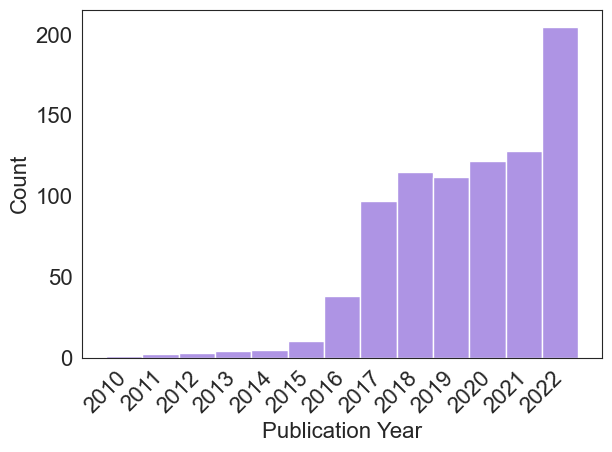

In [7]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="years", bins=13, ax=ax, color="mediumpurple")
ax.set_xticks(np.arange(2010, 2023))
ax.set_xticklabels(np.arange(2010, 2023), rotation=45)
ax.set_xlabel('Publication Year')
ax.set_ylabel('Count')

plt.tight_layout()

plt.savefig('OPEP3_dataset_years.pdf', dpi=600)
plt.savefig('OPEP3_dataset_years.png', dpi=600)

plt.show()


## Average PCE reported in dataset

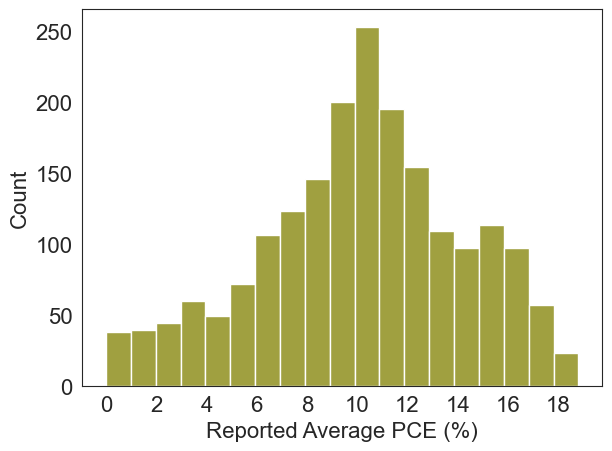

In [8]:
fig, ax = plt.subplots()
sns.histplot(data=dataset, x="PCE_avg", bins=19, ax=ax, color="olive")
ax.set_xticks(np.arange(0, 20, 2))
ax.set_xticklabels(np.arange(0, 20, 2))
ax.set_xlabel('Reported Average PCE (%)')
ax.set_ylabel('Count')

plt.tight_layout()

plt.savefig('OPEP3_dataset_average_PCE.pdf', dpi=600)
plt.savefig('OPEP3_dataset_average_PCE.png', dpi=600)

plt.show()
